<a href="https://colab.research.google.com/github/Niraj2003/MachineLearning/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/datasets/housing.csv')
housing.head()
housing.pop('ocean_proximity')
housing.pop('total_bedrooms')
housing.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')

In [ ]:
hnorm = (housing - housing.min())/(housing.max() - housing.min())
hnorm.isna().sum
target = housing.pop('median_house_value')
X = hnorm.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
y_train.shape


(16512,)

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
y_test.shape

(4128,)

In [ ]:
model = keras.models.Sequential(
    [        
        keras.layers.Dense(64, activation= 'relu', input_shape=(8,)),
        keras.layers.Dense(1,activation='linear')
    ]
)

model.compile(optimizer="sgd", 
              loss="mean_absolute_error", 
              metrics=[
                  'mae',
                  'mse',
                  'mean_absolute_percentage_error'
              ]
    )

history = model.fit(X_train, y_train, epochs=20, verbose=1,batch_size=32,validation_data=(X_test, y_test))


Epoch 1/20
516/516 [==============================] - 3s 4ms/step - loss: 189636.6406 - mae: 189636.6406 - mse: 49993285632.0000 - mean_absolute_percentage_error: 90.0209 - val_loss: 78607.5625 - val_mae: 78607.5625 - val_mse: 11332836352.0000 - val_mean_absolute_percentage_error: 46.3230
Epoch 2/20
516/516 [==============================] - 2s 3ms/step - loss: 62312.6680 - mae: 62312.6680 - mse: 6911539712.0000 - mean_absolute_percentage_error: 38.7701 - val_loss: 36940.0938 - val_mae: 36940.0938 - val_mse: 2348334336.0000 - val_mean_absolute_percentage_error: 23.8424
Epoch 3/20
516/516 [==============================] - 1s 3ms/step - loss: 12594.5010 - mae: 12594.5010 - mse: 435659968.0000 - mean_absolute_percentage_error: 7.2863 - val_loss: 4522.9663 - val_mae: 4522.9663 - val_mse: 39958252.0000 - val_mean_absolute_percentage_error: 2.6198
Epoch 4/20
516/516 [==============================] - 1s 3ms/step - loss: 4322.3447 - mae: 4322.3447 - mse: 26247740.0000 - mean_absolute_percent

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                576       
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
htest = model.evaluate(X_test, y_test)
htest

129/129 [==============================] - 0s 2ms/step - loss: 3955.8833 - mae: 3955.8833 - mse: 17858474.0000 - mean_absolute_percentage_error: 2.2893


[3955.88330078125, 3955.88330078125, 17858474.0, 2.2893097400665283]

In [ ]:
predict = model.predict(X_test)
predict

129/129 [==============================] - 0s 1ms/step


array([[359353.62 ],
       [ 72701.734],
       [232631.06 ],
       ...,
       [354275.75 ],
       [231792.22 ],
       [144611.86 ]], dtype=float32)

In [ ]:
loss, mae, mse, mape = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print("Loss ", loss)
print("Mean Absolute Eror ", mae)
print("Mean Square Eror ", mse)
print("Root Mean Square Eror ", rmse)
print("Mean Absolute Percentage Eror ", mape)


129/129 [==============================] - 0s 2ms/step - loss: 3955.8833 - mae: 3955.8833 - mse: 17858474.0000 - mean_absolute_percentage_error: 2.2893
Loss  3955.88330078125
Mean Absolute Eror  3955.88330078125
Mean Square Eror  17858474.0
Root Mean Square Eror  4225.928773654378
Mean Absolute Percentage Eror  2.2893097400665283


In [ ]:
Accuracy = 100 - mape
Accuracy

97.71069025993347

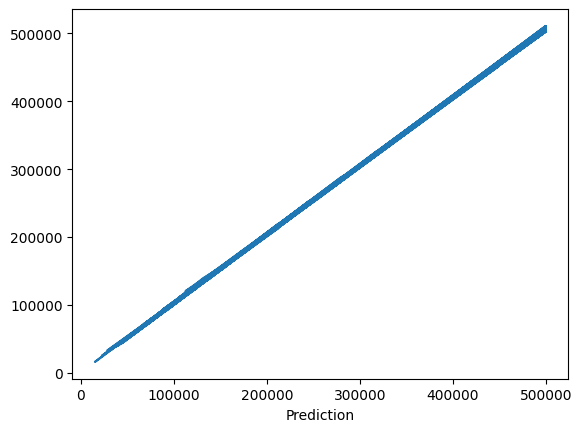

In [ ]:
plt.plot(y_test, predict)
plt.xlabel("Original Values ")
plt.xlabel("Prediction")
plt.show()

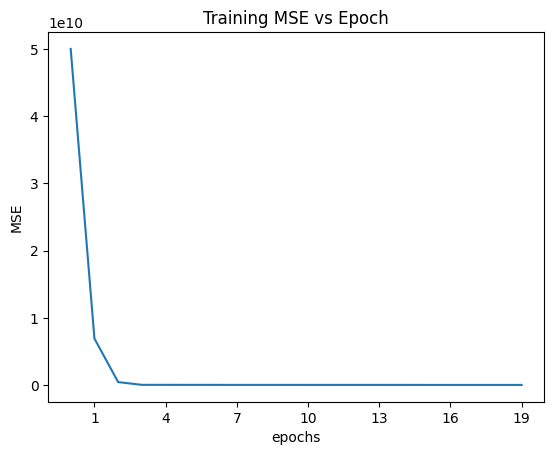

In [ ]:
plt.plot(history.history['mse'])
plt.title("Training MSE vs Epoch")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.xticks(range(1,21,3))
plt.show()